
Vehicle Maintenance Component Analysis
Total Maintenance Index: 74.84

Component Breakdown:

Mechanical Components:
Raw Value: 58.33
Normalized Score: 58.33
Contribution to Total: 14.58
Status: Fair
Recommendation: Monitor mechanical conditions

Tire & Brake:
Raw Value: 88.00
Normalized Score: 88.00
Contribution to Total: 17.60
Status: Critical
Recommendation: Immediate tire/brake service required

Age & Mileage:
Raw Value: 63.33
Normalized Score: 63.33
Contribution to Total: 12.67
Status: Aging
Recommendation: Plan for major maintenance

Liquid Efficiency:
Raw Value: 82.75
Normalized Score: 82.75
Contribution to Total: 12.41
Status: Poor
Recommendation: Diagnostic check required

Maintenance History:
Raw Value: 87.90
Normalized Score: 87.90
Contribution to Total: 17.58
Status: Poor
Recommendation: Establish regular maintenance schedule


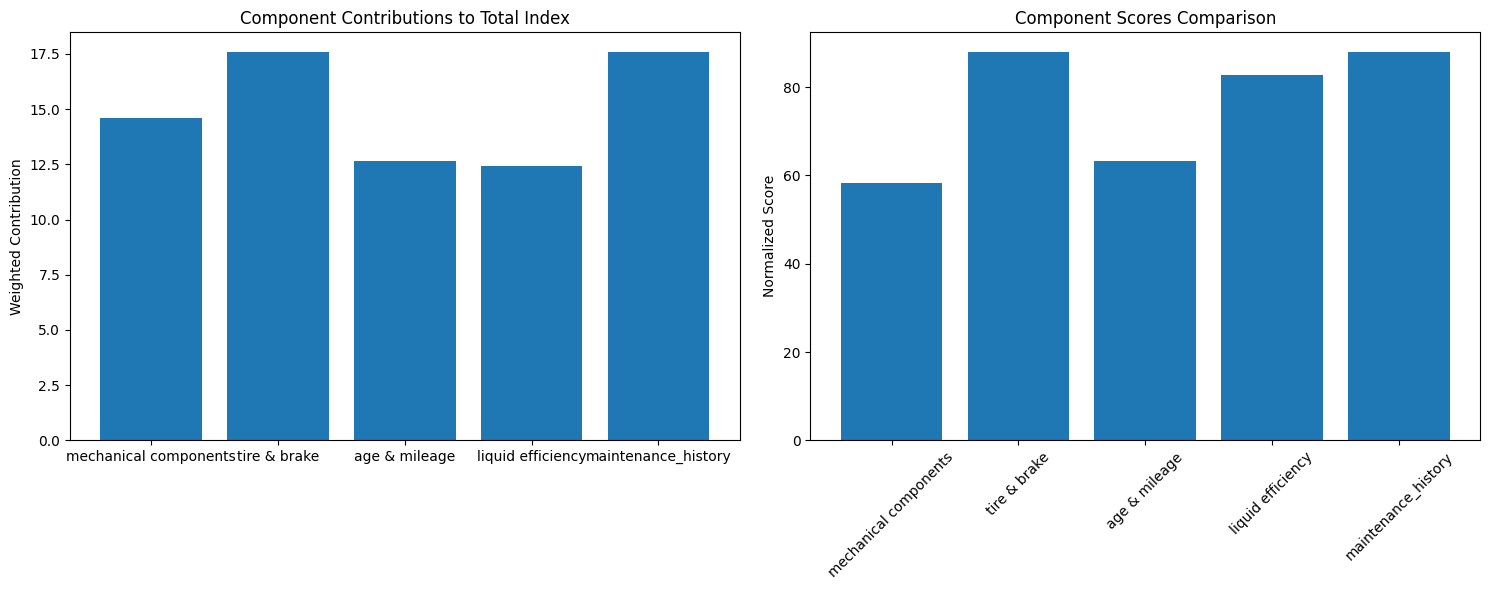

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass
from typing import Dict, List, Optional

@dataclass
class ComponentScore:
    raw_value: float
    normalized_score: float
    weight: float
    contribution: float
    status: str
    recommendation: str

class VehicleComponentIndex:
    def __init__(self):
        self.scaler = MinMaxScaler()

        # Updated weights to include new components
        self.weights = {
            'mechanical_index': 0.25,
            'age_mileage_index': 0.20,
            'efficiency_index': 0.15,
            'maintenance_history_index': 0.20,
            'tire_brake_index': 0.20  # New component
        }

        # Define thresholds for status categories
        self.thresholds = {
            'critical': 80,
            'warning': 60,
            'moderate': 40,
            'good': 20
        }

    def calculate_mechanical_index(self,
                                 engine_health: float,      # 0-100 scale
                                 transmission_health: float, # 0-100 scale
                                 spark_plug_health: float   # 0-100 scale
                                ) -> ComponentScore:
        """Calculate mechanical health index including spark plug condition"""
        raw_value = np.mean([engine_health, transmission_health, spark_plug_health])
        normalized_score = self._normalize_score(raw_value)
        weight = self.weights['mechanical_index']
        contribution = normalized_score * weight

        status, recommendation = self._get_status_and_recommendation('mechanical', normalized_score)

        return ComponentScore(
            raw_value=raw_value,
            normalized_score=normalized_score,
            weight=weight,
            contribution=contribution,
            status=status,
            recommendation=recommendation
        )

    def calculate_tire_brake_index(self,
                                 tire_condition: float,     # 0-100 scale
                                 brake_pad_health: float,   # 0-100 scale
                                 brake_fluid_health: float, # 0-100 scale
                                 brake_rotor_health: float  # 0-100 scale
                                ) -> ComponentScore:
        """Calculate tire and brake system health index"""
        # Weight the components (tire condition and overall brake health equally)
        brake_health = np.mean([brake_pad_health, brake_fluid_health, brake_rotor_health])
        raw_value = np.mean([tire_condition, brake_health])

        normalized_score = self._normalize_score(raw_value)
        weight = self.weights['tire_brake_index']
        contribution = normalized_score * weight

        status, recommendation = self._get_status_and_recommendation('tire_brake', normalized_score)

        return ComponentScore(
            raw_value=raw_value,
            normalized_score=normalized_score,
            weight=weight,
            contribution=contribution,
            status=status,
            recommendation=recommendation
        )

    def calculate_age_mileage_index(self,
                                  age_years: float,
                                  mileage: float,
                                  vehicle_traveled: float  # Daily average miles
                                 ) -> ComponentScore:
        """Calculate age and mileage based index including vehicle travel patterns"""
        # Convert to a 0-100 scale where newer/lower mileage = better score
        age_score = max(0, 100 - (age_years * 7))  # Assumes 15 years as maximum age
        mileage_score = max(0, 100 - (mileage / 2000))  # Assumes 200,000 miles as maximum

        # Factor in daily travel (assuming 100 miles/day as high usage)
        travel_score = max(0, 100 - (vehicle_traveled / 100) * 100)

        raw_value = np.mean([age_score, mileage_score, travel_score])
        normalized_score = self._normalize_score(raw_value)
        weight = self.weights['age_mileage_index']
        contribution = normalized_score * weight

        status, recommendation = self._get_status_and_recommendation('age_mileage', normalized_score)

        return ComponentScore(
            raw_value=raw_value,
            normalized_score=normalized_score,
            weight=weight,
            contribution=contribution,
            status=status,
            recommendation=recommendation
        )

    def calculate_efficiency_index(self,
                                 fuel_efficiency: float,  # MPG
                                 oil_consumption: float,  # Quarts/1000 miles
                                 coolant_health: float,   # 0-100 scale
                                 spark_plug_efficiency: float  # 0-100 scale
                                ) -> ComponentScore:
        """Calculate efficiency index including spark plug efficiency"""
        # Normalize fuel efficiency (assuming 50 MPG as excellent)
        fuel_score = min(100, (fuel_efficiency / 50) * 100)

        # Normalize oil consumption (0-5 quarts/1000 miles scale)
        oil_score = max(0, 100 - (oil_consumption * 20))

        raw_value = np.mean([fuel_score, oil_score, coolant_health, spark_plug_efficiency])
        normalized_score = self._normalize_score(raw_value)
        weight = self.weights['efficiency_index']
        contribution = normalized_score * weight

        status, recommendation = self._get_status_and_recommendation('efficiency', normalized_score)

        return ComponentScore(
            raw_value=raw_value,
            normalized_score=normalized_score,
            weight=weight,
            contribution=contribution,
            status=status,
            recommendation=recommendation
        )

    def calculate_maintenance_history_index(self,
                                         service_interval_adherence: float,  # 0-100 scale
                                         last_service_age_months: float,
                                         repair_frequency: float,  # repairs per year
                                         tire_rotation_adherence: float,  # 0-100 scale
                                         brake_service_adherence: float   # 0-100 scale
                                        ) -> ComponentScore:
        """Calculate maintenance history index including tire and brake maintenance"""
        # Normalize service age (assuming 12 months as maximum)
        service_age_score = max(0, 100 - (last_service_age_months * 8.33))

        # Normalize repair frequency (assuming 4 repairs/year as maximum)
        repair_score = max(0, 100 - (repair_frequency * 25))

        raw_value = np.mean([
            service_interval_adherence,
            service_age_score,
            repair_score,
            tire_rotation_adherence,
            brake_service_adherence
        ])

        normalized_score = self._normalize_score(raw_value)
        weight = self.weights['maintenance_history_index']
        contribution = normalized_score * weight

        status, recommendation = self._get_status_and_recommendation('maintenance_history', normalized_score)

        return ComponentScore(
            raw_value=raw_value,
            normalized_score=normalized_score,
            weight=weight,
            contribution=contribution,
            status=status,
            recommendation=recommendation
        )

    def _normalize_score(self, score: float) -> float:
        """Normalize score to 0-100 scale"""
        return max(0, min(100, score))

    def _get_status_and_recommendation(self, component_type: str, score: float) -> tuple:
        """Get status and recommendation based on score"""

        status_recommendations = {
            'mechanical': {
                'critical': ('Critical', 'Immediate mechanical inspection required'),
                'warning': ('Warning', 'Schedule mechanical inspection soon'),
                'moderate': ('Fair', 'Monitor mechanical conditions'),
                'good': ('Good', 'Continue regular maintenance')
            },
            'tire_brake': {
                'critical': ('Critical', 'Immediate tire/brake service required'),
                'warning': ('Warning', 'Schedule tire/brake inspection soon'),
                'moderate': ('Fair', 'Monitor tire and brake wear'),
                'good': ('Good', 'Continue regular tire/brake maintenance')
            },
            'age_mileage': {
                'critical': ('High Risk', 'Consider vehicle replacement'),
                'warning': ('Aging', 'Plan for major maintenance'),
                'moderate': ('Moderate', 'Regular maintenance important'),
                'good': ('Good', 'Continue normal maintenance')
            },
            'efficiency': {
                'critical': ('Poor', 'Diagnostic check required'),
                'warning': ('Declining', 'Efficiency inspection needed'),
                'moderate': ('Fair', 'Monitor efficiency metrics'),
                'good': ('Efficient', 'Maintain current conditions')
            },
            'maintenance_history': {
                'critical': ('Poor', 'Establish regular maintenance schedule'),
                'warning': ('Irregular', 'Improve maintenance adherence'),
                'moderate': ('Fair', 'Maintain service schedule'),
                'good': ('Good', 'Continue regular maintenance')
            }
        }

        if score >= self.thresholds['critical']:
            return status_recommendations[component_type]['critical']
        elif score >= self.thresholds['warning']:
            return status_recommendations[component_type]['warning']
        elif score >= self.thresholds['moderate']:
            return status_recommendations[component_type]['moderate']
        else:
            return status_recommendations[component_type]['good']

    def calculate_total_index(self, component_scores: Dict[str, ComponentScore]) -> float:
        """Calculate total maintenance index from component scores"""
        return sum(score.contribution for score in component_scores.values())

    def plot_component_breakdown(self, component_scores: Dict[str, ComponentScore]):
        """Visualize component contributions to total index"""
        components = list(component_scores.keys())
        contributions = [score.contribution for score in component_scores.values()]
        normalized_scores = [score.normalized_score for score in component_scores.values()]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Contribution breakdown
        ax1.bar(components, contributions)
        ax1.set_title('Component Contributions to Total Index')
        ax1.set_ylabel('Weighted Contribution')
        plt.xticks(rotation=45)

        # Component scores comparison
        ax2.bar(components, normalized_scores)
        ax2.set_title('Component Scores Comparison')
        ax2.set_ylabel('Normalized Score')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    indexer = VehicleComponentIndex()

    # Calculate individual component scores with new parameters
    component_scores = {
        'mechanical components': indexer.calculate_mechanical_index(
            engine_health=85,
            transmission_health=88,
            spark_plug_health=2
        ),
        'tire & brake': indexer.calculate_tire_brake_index(
            tire_condition=85,
            brake_pad_health=90,
            brake_fluid_health=95,
            brake_rotor_health=88
        ),
        'age & mileage': indexer.calculate_age_mileage_index(
            age_years=5,
            mileage=60000,
            vehicle_traveled=45  # daily miles
        ),
        'liquid efficiency': indexer.calculate_efficiency_index(
            fuel_efficiency=28,
            oil_consumption=0.5,
            coolant_health=95,
            spark_plug_efficiency=90
        ),
        'maintenance_history': indexer.calculate_maintenance_history_index(
            service_interval_adherence=95,
            last_service_age_months=3,
            repair_frequency=0.5,
            tire_rotation_adherence=90,
            brake_service_adherence=92
        )
    }

    # Calculate total index
    total_index = indexer.calculate_total_index(component_scores)

    # Print detailed report
    print("\nVehicle Maintenance Component Analysis")
    print("=====================================")
    print(f"Total Maintenance Index: {total_index:.2f}")
    print("\nComponent Breakdown:")

    for component, score in component_scores.items():
        print(f"\n{component.replace('_', ' ').title()}:")
        print(f"Raw Value: {score.raw_value:.2f}")
        print(f"Normalized Score: {score.normalized_score:.2f}")
        print(f"Contribution to Total: {score.contribution:.2f}")
        print(f"Status: {score.status}")
        print(f"Recommendation: {score.recommendation}")

    # Visualize component breakdown
    indexer.plot_component_breakdown(component_scores)